# Analisis Exploratorio (EDA) Ejercicio

Raul Jimenez 19017

Oscar Saravia 19322

Donaldo Garcia 19683

In [213]:
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns
import random

## 1. (3 puntos) Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos. 

In [214]:
movies = pd.read_csv('./movies.csv', encoding ='latin1')
movies.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


In [215]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10000.0,2.498768e+05,2.573801e+05,5.000,12286.50000,152558.0000,4.520218e+05,9.222600e+05
budget,10000.0,1.855163e+07,3.662669e+07,0.000,0.00000,500000.0000,2.000000e+07,3.800000e+08
revenue,10000.0,5.673793e+07,1.495854e+08,0.000,0.00000,163124.5000,4.479661e+07,2.847246e+09
runtime,10000.0,1.002681e+02,2.777783e+01,0.000,90.00000,100.0000,1.130000e+02,7.500000e+02
popularity,10000.0,5.139391e+01,2.167296e+02,4.258,14.57775,21.9055,4.065400e+01,1.147465e+04
voteAvg,10000.0,6.483490e+00,9.842740e-01,1.300,5.90000,6.5000,7.200000e+00,1.000000e+01
voteCount,10000.0,1.342382e+03,2.564197e+03,1.000,120.00000,415.0000,1.316000e+03,3.078800e+04
genresAmount,10000.0,2.596500e+00,1.154565e+00,0.000,2.00000,3.0000,3.000000e+00,1.600000e+01
productionCoAmount,10000.0,3.171400e+00,2.539738e+00,0.000,2.00000,3.0000,4.000000e+00,8.900000e+01
productionCountriesAmount,10000.0,1.751000e+00,3.012093e+00,0.000,1.00000,1.0000,2.000000e+00,1.550000e+02


## 2. (5 puntos) Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta) 

- id: id de la película **cualitativo, ordinal**
- popularity: Índice de popularidad de la película calculado semanalmente **cuantitativo, continuo** 
- budget: El presupuesto para la película **cuantitativo, continua** 
- revenue: El ingreso de la película **cuantitativo, continua**
- original_title: El título original de la película, en su idioma original **cualitativa, nominal** 
- originalLanguage: Idioma original en que se encuentra la película **cualititva, nominal**
- title: El título de la película traducido al inglés **cualitativa, nominal**
- homePage: La página de inicio de la película **cualitativa, nomial**
- video: Si tiene videos promocionales o no **cualitativa, nominal**
- director: Director de la película **cualitativo, nominal**
- runtime: La duración de la película **cuantitativo, continuo**
- genres: El género de la película **cualitativa, nominal**
- genresAmount: Cantidad de géneros que representan la película **cuantitativo, discreto**
- productionCompany: Las compañías productoras de la película **cualitativa, nominal**
- productionCoAmount: Cantidad de compañías productoras que participaron en la película **cuantitativo, discreto**  
- productionCompanyCountry: Países de las compañías productoras de la película **cualitativa, nominal**
- productionCountry: Países en los que se llevó a cabo la producción de la película **cualitativo, nominal**
- productionCountriesAmount: Cantidad de países en los que se rodó la película **cuantitativa, discreta**
- releaseDate: Fecha de lanzamiento de la película **cuantitativo, discreto**
- voteCount: El número de votos en la plataforma para la película **cuantitativo, discreto**
- voteAvg: El promedio de los votos en la plataforma para la película **cuantitativo, continuo**
- actors: Actores que participan en la película (Elenco) **cualitativo, nominal**
- actorsPopularity: Índice de popularidad del elenco de la película **cuantiativo, continuo**
- actorsCharacter: Personaje que interpreta cada actor en la película **cualitativo, nominal** 
- actorsAmount: Cantidad de personas que actúan en la película **cuantitativo, discreto**
- castWomenAmount: Cantidad de actrices en el elenco de la película **cuantitativo, discreto**
- castMenAmount: Cantidad de actores en el elenco de la película. **cuantitativo, discreto**

## 3.(6 puntos) Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados. 

### Tabla de frecuencias

In [216]:
movies.count()

id                           10000
budget                       10000
genres                        9947
homePage                      4193
productionCompany             9543
                             ...  
productionCoAmount           10000
productionCountriesAmount    10000
actorsAmount                 10000
castWomenAmount              10000
castMenAmount                10000
Length: 27, dtype: int64

### popularity 
Se puede determinar que la variable de popularity **NO** sigue una distribucion normal debido a que el histograma no sigue la forma de campana, en el boxplot se puede observar como es que la mayoria de los datos no entran en la caja al igual que en el diagrama QQ se puede observar que los datos son muy distintos entre si.

In [219]:
pd.value_counts(movies.popularity)

9.336     4
12.273    4
11.878    4
13.196    4
14.134    4
         ..
57.905    1
22.598    1
13.058    1
9.713     1
83.747    1
Name: popularity, Length: 8972, dtype: int64

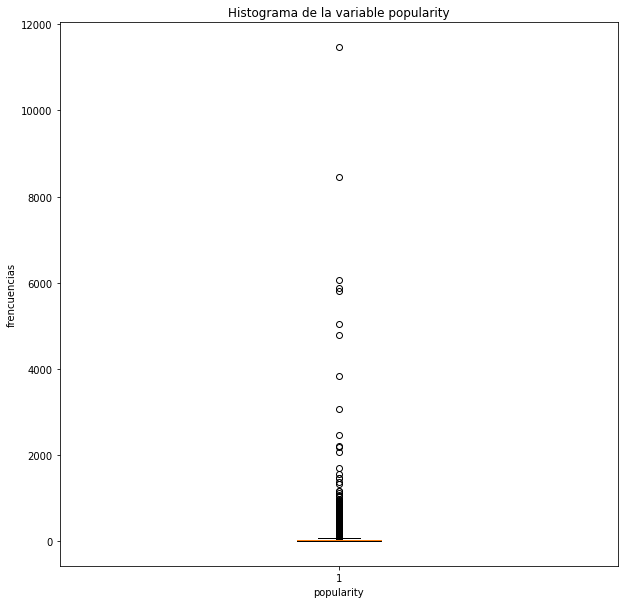

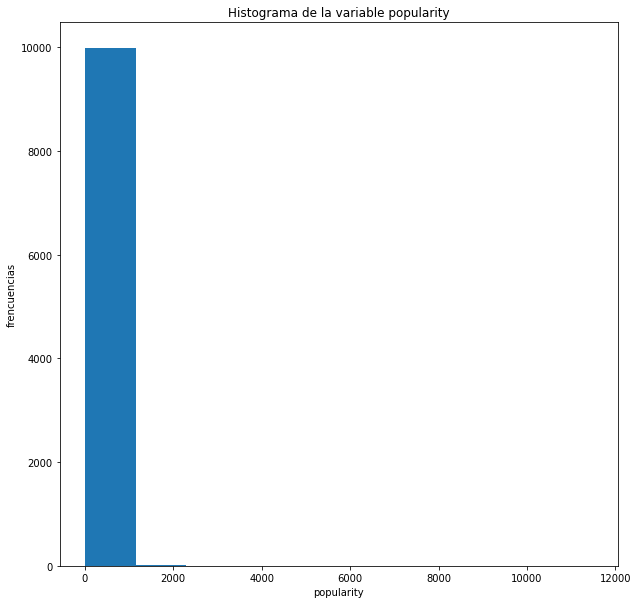

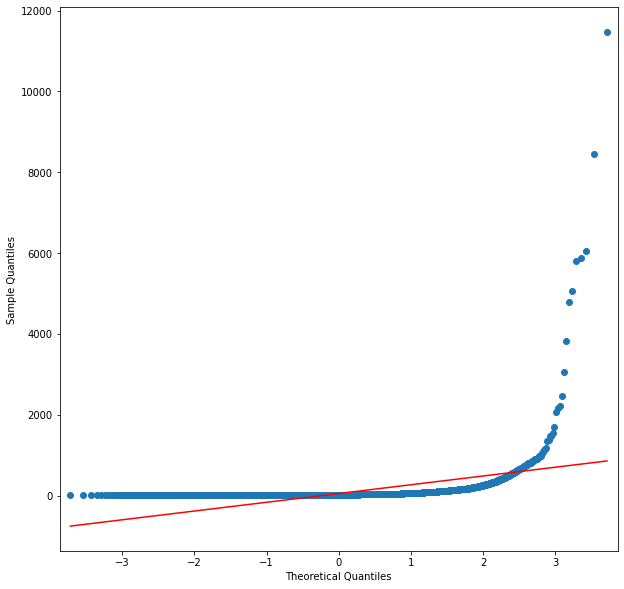

In [217]:
plt.boxplot(x = movies.popularity.dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

plt.hist(x = movies.popularity.dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.popularity.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

#### popularity sin datos atipicos (menores < 1000)

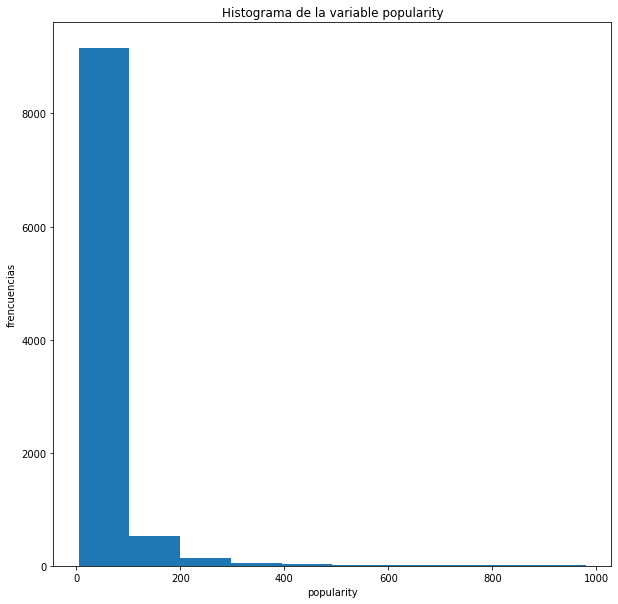

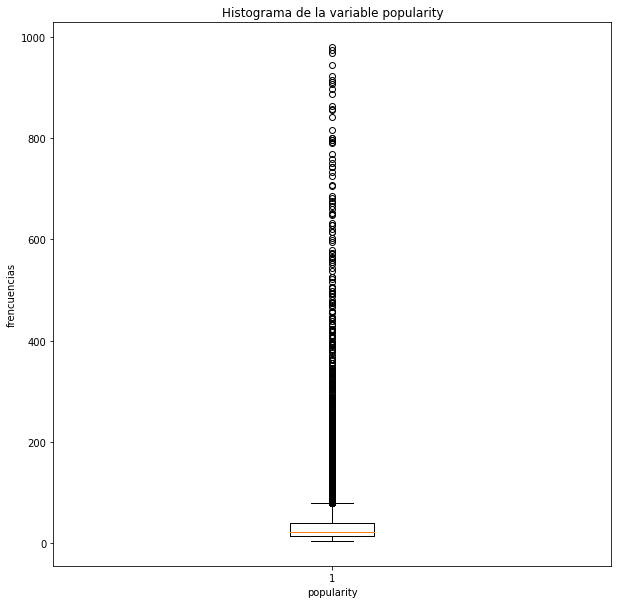

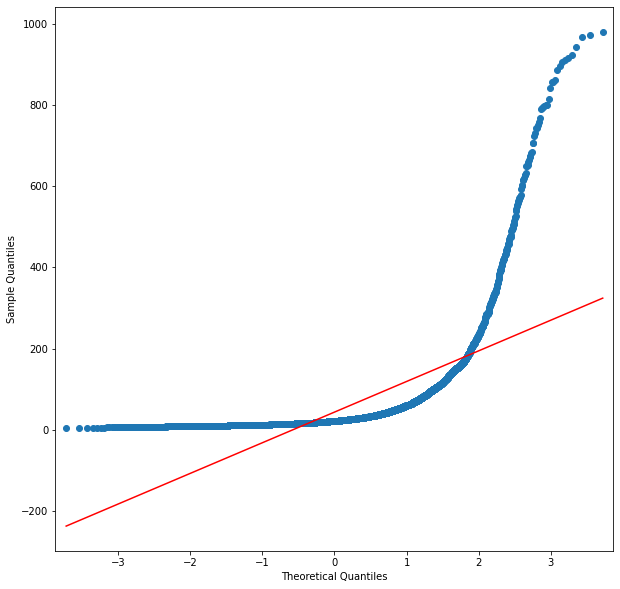

In [218]:
plt.hist(x = movies.popularity[movies.popularity < 1000].dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

plt.boxplot(x = movies.popularity[movies.popularity < 1000].dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.popularity[movies.popularity < 1000].dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### budget NO ES PONER POR QUE

In [ ]:
plt.hist(x = movies.budget.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable budget')
plt.xlabel('budget')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.budget.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### revenue NO ES, PONER POR QUE

In [ ]:
plt.hist(x = movies.revenue.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable revenue')
plt.xlabel('revenue')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.revenue.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### runtime NO ES, PONER POR QUE

In [ ]:
plt.hist(x = movies.runtime.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable runtime')
plt.xlabel('runtime')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.runtime.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### genresAmount NO ES, PONER POR QUE

In [ ]:
plt.hist(x = movies.genresAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable genresAmount')
plt.xlabel('genresAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.genresAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### productionCoAmount

In [ ]:
plt.hist(x = movies.productionCoAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable productionCoAmount')
plt.xlabel('productionCoAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.productionCoAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### productionCountriesAmount

In [ ]:
plt.hist(x = movies.productionCountriesAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable productionCountriesAmount')
plt.xlabel('productionCountriesAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.productionCountriesAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### releaseDate

In [ ]:
plt.hist(x = movies.releaseDate.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable releaseDate')
plt.xlabel('releaseDate')
plt.ylabel('frencuencias')
plt.show()


### voteCount

In [ ]:
plt.hist(x = movies.voteCount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable voteCount')
plt.xlabel('voteCount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.voteCount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### voteAvg

In [ ]:
plt.hist(x = movies.voteAvg.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable voteAvg')
plt.xlabel('voteAvg')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.voteAvg.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### actorsAmount

In [ ]:
plt.hist(x = movies.actorsAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable actorsAmount')
plt.xlabel('actorsAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.actorsAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### castWomenAmount

In [ ]:
plt.hist(x = movies.castWomenAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable castWomenAmount')
plt.xlabel('castWomenAmount')
plt.ylabel('frencuencias')
plt.show()

# distribucion_generada = movies.castWomenAmount.dropna()
# # Represento el Q-Q plot
# qqplot(distribucion_generada , line='s')
# plt.show()


### castMenAmount

In [ ]:
plt.hist(x = movies.castMenAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable castMenAmount')
plt.xlabel('castMenAmount')
plt.ylabel('frencuencias')
plt.show()

# distribucion_generada = movies.castMenAmount.dropna()
# # Represento el Q-Q plot
# qqplot(distribucion_generada , line='s')
# plt.show()


## 4. Responda las siguientes preguntas: 

### (3 puntos) ¿Cuáles son las 10 películas que contaron con más presupuesto? 

In [ ]:
movies.nlargest(10, 'budget')['title']

###   (3 puntos) ¿Cuáles son las 10 películas que más ingresos tuvieron? 

In [ ]:
movies.nlargest(10, 'revenue')['title']

### (3 puntos) ¿Cuál es la película que más votos tuvo? 

In [ ]:
movies.nlargest(1, 'voteCount')['title']

### (3 puntos) ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios? 

In [ ]:
movies.nsmallest(1, 'voteAvg')['title']

### (8  puntos)  ¿Cuántas  películas  se  hicieron  en  cada  año?  ¿En  qué  año  se  hicieron  más películas? Haga un gráfico de barras 

In [ ]:
pd.value_counts(pd.to_datetime(movies.releaseDate).dt.year)

In [ ]:
# Diagrama de barras es para cualitativas y histograma es cuantitativa
eje_x = np.array(pd.value_counts(pd.to_datetime(movies.releaseDate).dt.year).keys())
eje_y = pd.value_counts(pd.to_datetime(movies.releaseDate).dt.year)

plt.bar(eje_x, eje_y)
plt.rcParams['figure.figsize'] = (10, 10)
plt.ylabel('Frecuencia de la variable release year')
plt.xlabel('Años')
plt.title('Grafico de barras para la variable release year')
plt.show()

### (9 puntos) ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico 

In [ ]:
movies['firstGenre'] = movies['genres'].str.split('|', n=-1).str[0]